<a href="https://colab.research.google.com/github/umiSirya/Weather_Prediction_capstone_project/blob/main/weather(UV_index)_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UV Predictor & SPF Guide**

Excessive sun exposure can lead to skin damage, premature aging, and even skin cancer. To stay protected, it’s essential to use the right sunscreen based on the **UV index**. This project combines **machine learning** with a **sunscreen recommendation system** to help users make informed decisions.  

By predicting the **UV index** based on weather data, the system recommends the most suitable **SPF level** and **sunscreen brand** to ensure optimal skin protection. With an easy-to-use **Streamlit interface**, users can enter their city, get real-time UV predictions, and receive personalized sunscreen suggestions.  

This project aims to promote **sun safety** through **AI-driven recommendations**, making it easier for users to choose the best sun protection anytime, anywhere. ☀️✨

# **Data Sourcing**
The **weather data** used in this project is sourced from a **weather API**, ensuring real-time and accurate UV index predictions based on the user's location.

link:https://www.weatherapi.com/

As for the **sunscreen data**, I personally collected and curated a list of sunscreens along with their **SPF ratings**, ensuring a diverse selection for different UV exposure levels. This combination allows the system to provide **reliable and personalized sunscreen recommendations** for optimal sun protection.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import math
import sklearn
import xgboost


import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


**Getting Weather Data**

In [2]:
import requests
import csv

# API Key
API_KEY = "4091f433030f47658ea85020253001"

# List of major cities in Kenya
kenyan_cities = [
    "Nairobi", "Mombasa", "Kisumu", "Nakuru", "Eldoret", "Malindi", "Thika",
    "Kitale", "Garissa", "Kakamega", "Kericho", "Lamu", "Meru", "Nyeri",
    "Embu", "Voi", "Machakos", "Bomet", "Kisii", "Bungoma", "Siaya",
    "Homa Bay", "Kisumu", "Lodwar", "Taveta", "Kitui", "Murang'a",
    "Isiolo", "Mwingi", "Ruiru", "Kiambu", "Nandi Hills", "Samburu",
    "Chuka", "Kendu Bay", "Wajir", "Mandera", "Marsabit", "Baringo",
    "Taita", "Nyamira", "Laikipia", "Trans Nzoia", "Kajiado"
]

# File name for CSV output
filename = "kenya_weather_data.csv"

# Open CSV file and write headers
with open(filename, mode="w", newline="") as file:
    writer = csv.writer(file)

    # Writing header row
    headers = [
        "City", "Country", "Latitude", "Longitude", "Local Time",
        "Temperature (°C)", "Feels Like (°C)", "Humidity (%)", "Pressure (mb)",
        "Wind Speed (km/h)", "Wind Direction", "UV Index", "Visibility (km)", "Weather Condition",
        "Air Quality Index (US)", "PM2.5", "PM10", "CO (Carbon Monoxide)", "NO2 (Nitrogen Dioxide)", "SO2 (Sulfur Dioxide)",
        "Tomorrow's Max Temp (°C)", "Tomorrow's Min Temp (°C)", "Tomorrow's Condition", "Sunrise", "Sunset"
    ]
    writer.writerow(headers)

    # Loop through each city and fetch weather data
    for city in kenyan_cities:
        try:
            URL = f"http://api.weatherapi.com/v1/forecast.json?key={API_KEY}&q={city}&days=3&aqi=yes"
            response = requests.get(URL)
            data = response.json()

            # Extract comprehensive weather details
            weather_data = [
                data["location"]["name"],
                data["location"]["country"],
                data["location"]["lat"],
                data["location"]["lon"],
                data["location"]["localtime"],

                # Current Weather
                data["current"]["temp_c"],
                data["current"]["feelslike_c"],
                data["current"]["humidity"],
                data["current"]["pressure_mb"],
                data["current"]["wind_kph"],
                data["current"]["wind_dir"],
                data["current"]["uv"],
                data["current"]["vis_km"],
                data["current"]["condition"]["text"],

                # Air Quality Data
                data["current"]["air_quality"].get("us-epa-index", "N/A"),
                data["current"]["air_quality"].get("pm2_5", "N/A"),
                data["current"]["air_quality"].get("pm10", "N/A"),
                data["current"]["air_quality"].get("co", "N/A"),
                data["current"]["air_quality"].get("no2", "N/A"),
                data["current"]["air_quality"].get("so2", "N/A"),

                # Forecast (Next Day)
                data["forecast"]["forecastday"][1]["day"]["maxtemp_c"],
                data["forecast"]["forecastday"][1]["day"]["mintemp_c"],
                data["forecast"]["forecastday"][1]["day"]["condition"]["text"],
                data["forecast"]["forecastday"][1]["astro"]["sunrise"],
                data["forecast"]["forecastday"][1]["astro"]["sunset"],
            ]

            # Write data row
            writer.writerow(weather_data)
            print(f"✅ Weather data for {city} saved.")

        except Exception as e:
            print(f"❌ Error fetching data for {city}: {e}")

print(f"\n🎉 Comprehensive weather data for Kenya saved to {filename} successfully!")


✅ Weather data for Nairobi saved.
✅ Weather data for Mombasa saved.
✅ Weather data for Kisumu saved.
✅ Weather data for Nakuru saved.
✅ Weather data for Eldoret saved.
✅ Weather data for Malindi saved.
✅ Weather data for Thika saved.
✅ Weather data for Kitale saved.
✅ Weather data for Garissa saved.
✅ Weather data for Kakamega saved.
✅ Weather data for Kericho saved.
✅ Weather data for Lamu saved.
✅ Weather data for Meru saved.
✅ Weather data for Nyeri saved.
✅ Weather data for Embu saved.
✅ Weather data for Voi saved.
✅ Weather data for Machakos saved.
✅ Weather data for Bomet saved.
✅ Weather data for Kisii saved.
✅ Weather data for Bungoma saved.
✅ Weather data for Siaya saved.
✅ Weather data for Homa Bay saved.
✅ Weather data for Kisumu saved.
✅ Weather data for Lodwar saved.
✅ Weather data for Taveta saved.
✅ Weather data for Kitui saved.
✅ Weather data for Murang'a saved.
✅ Weather data for Isiolo saved.
✅ Weather data for Mwingi saved.
✅ Weather data for Ruiru saved.
✅ Weather d

**Sunscreen data**

In [3]:
import csv

# List of sunscreens with their SPF ratings
sunscreens = [
    ["Neutrogena Ultra Sheer Dry-Touch Sunscreen", 100],
    ["EltaMD UV Clear Broad-Spectrum Sunscreen", 46],
    ["Supergoop! Unseen Sunscreen", 40],
    ["La Roche-Posay Anthelios Melt-in Milk Sunscreen", 60],
    ["CeraVe Hydrating Mineral Sunscreen", 30],
    ["Banana Boat Ultra Sport Sunscreen", 50],
    ["Hawaiian Tropic Sheer Touch Lotion Sunscreen", 30],
    ["Blue Lizard Sensitive Mineral Sunscreen", 50],
    ["Coppertone Sport Sunscreen Spray", 50],
    ["Aveeno Protect + Hydrate Sunscreen", 60],
    ["Bioré UV Aqua Rich Watery Essence", 50],
    ["Sun Bum Original Sunscreen Lotion", 50],
    ["Shiseido Ultimate Sun Protector Lotion", 50],
    ["Thinkbaby Safe Sunscreen", 50],
    ["Coola Classic Face Sunscreen", 30],
    ["Australian Gold Botanical Sunscreen Tinted Face", 50],
    ["Eucerin Daily Hydration Sunscreen", 30],
    ["Babo Botanicals Clear Zinc Sunscreen", 30],
    ["ISDIN Eryfotona Actinica Mineral Sunscreen", 50],
    ["Alba Botanica Hawaiian Sunscreen", 45],
    ["Vanicream Sunscreen Sport", 35],
    ["Paula’s Choice Resist Super-Light Daily Wrinkle Defense", 30],
    ["Innisfree Daily UV Defense Sunscreen", 36],
    ["Badger Clear Zinc Sunscreen Cream", 40],
    ["Derma E Sun Defense Mineral Oil-Free Sunscreen", 30],
    ["Dr. Jart+ Every Sun Day Mineral Sunscreen", 50],
    ["Black Girl Sunscreen", 30],
    ["MD Solar Sciences Mineral Crème Sunscreen", 50],
    ["Peter Thomas Roth Water Drench Broad Spectrum Sunscreen", 45],
    ["Alastin HydraTint Pro Mineral Sunscreen", 36]
]

# Save as a CSV file
filename = "sunscreens.csv"
with open(filename, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Sunscreen Name", "SPF"])
    writer.writerows(sunscreens)

print(f"CSV file '{filename}' has been created successfully!")


CSV file 'sunscreens.csv' has been created successfully!


In [4]:
# Load sunscreen data
sunscreens= pd.read_csv("sunscreens.csv")
sunscreens.head()

,Sunscreen Name,SPF
0,Neutrogena Ultra Sheer Dry-Touch Sunscreen,100
1,EltaMD UV Clear Broad-Spectrum Sunscreen,46
2,Supergoop! Unseen Sunscreen,40
3,La Roche-Posay Anthelios Melt-in Milk Sunscreen,60
4,CeraVe Hydrating Mineral Sunscreen,30


In [5]:
sunscreens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sunscreen Name  30 non-null     object
 1   SPF             30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 612.0+ bytes


In [6]:
# Load the dataset
df = pd.read_csv("kenya_weather_data.csv")
df.head()

,City,Country,Latitude,Longitude,Local Time,Temperature (°C),Feels Like (°C),Humidity (%),Pressure (mb),Wind Speed (km/h),...,PM2.5,PM10,CO (Carbon Monoxide),NO2 (Nitrogen Dioxide),SO2 (Sulfur Dioxide),Tomorrow's Max Temp (°C),Tomorrow's Min Temp (°C),Tomorrow's Condition,Sunrise,Sunset
0,Nairobi,Kenya,-1.2833,36.8167,2025-02-20 09:09,18.2,18.2,77,1023.0,9.4,...,24.420,24.975,527.25,14.800,6.475,29.4,15.4,Sunny,06:42 AM,06:51 PM
1,Mombasa,Kenya,-4.0500,39.6667,2025-02-20 09:09,28.1,31.1,70,1011.0,13.7,...,27.010,34.595,314.50,5.735,2.960,31.0,25.0,Patchy rain nearby,06:28 AM,06:41 PM
2,Kisumu,Kenya,-0.1000,34.7500,2025-02-20 09:09,20.1,20.1,49,1017.0,10.4,...,31.265,31.820,699.30,13.320,2.220,31.5,19.6,Sunny,06:51 AM,06:58 PM
3,Nakuru,Kenya,-0.2833,36.0667,2025-02-20 09:09,14.0,14.7,55,1017.0,3.6,...,18.500,19.055,523.55,14.615,1.665,28.8,12.1,Sunny,06:46 AM,06:53 PM
4,Eldoret,Kenya,0.5167,35.2833,2025-02-20 09:09,21.1,21.1,28,1015.0,18.0,...,13.690,13.875,286.75,9.805,0.925,28.2,13.5,Sunny,06:49 AM,06:55 PM


# **Exploratory Data Analysis**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   City                      42 non-null     object 
 1   Country                   42 non-null     object 
 2   Latitude                  42 non-null     float64
 3   Longitude                 42 non-null     float64
 4   Local Time                42 non-null     object 
 5   Temperature (°C)          42 non-null     float64
 6   Feels Like (°C)           42 non-null     float64
 7   Humidity (%)              42 non-null     int64  
 8   Pressure (mb)             42 non-null     float64
 9   Wind Speed (km/h)         42 non-null     float64
 10  Wind Direction            42 non-null     object 
 11  UV Index                  42 non-null     float64
 12  Visibility (km)           42 non-null     float64
 13  Weather Condition         42 non-null     object 
 14  Air Quality 

In [8]:
sunscreens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sunscreen Name  30 non-null     object
 1   SPF             30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 612.0+ bytes


In [9]:
df.describe()

,Latitude,Longitude,Temperature (°C),Feels Like (°C),Humidity (%),Pressure (mb),Wind Speed (km/h),UV Index,Visibility (km),Air Quality Index (US),PM2.5,PM10,CO (Carbon Monoxide),NO2 (Nitrogen Dioxide),SO2 (Sulfur Dioxide),Tomorrow's Max Temp (°C),Tomorrow's Min Temp (°C)
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,-0.649648,36.440771,20.964286,21.269048,56.523810,1015.761905,10.152381,3.619048,9.761905,1.880952,25.569643,28.031905,506.547619,12.544762,2.563571,30.809524,17.002381
std,10.599948,26.660281,6.486038,7.274898,20.144888,3.980498,6.146990,1.217602,1.543033,0.632547,15.865631,20.431967,237.257207,16.698173,5.350365,5.030289,5.245741
min,-41.200000,-46.850000,-9.700000,-13.400000,21.000000,1010.000000,3.600000,0.000000,0.000000,1.000000,7.400000,10.175000,144.300000,0.555000,0.185000,6.900000,-2.800000
25%,-1.254150,34.825025,18.600000,18.600000,39.250000,1013.250000,4.975000,3.525000,10.000000,2.000000,15.910000,15.956250,299.700000,6.058750,0.555000,29.325000,14.425000
50%,-0.391700,36.825000,21.100000,21.100000,49.000000,1015.000000,9.000000,4.050000,10.000000,2.000000,23.957500,24.975000,482.850000,11.007500,1.110000,30.900000,16.000000
75%,0.333325,37.908300,25.275000,25.625000,77.000000,1017.000000,12.800000,4.275000,10.000000,2.000000,30.293750,32.652500,677.100000,14.522500,2.220000,33.050000,19.675000
max,46.766700,174.950000,28.900000,31.100000,98.000000,1024.000000,27.700000,4.600000,10.000000,4.000000,94.165000,123.580000,1076.700000,112.665000,34.780000,38.300000,25.800000


In [10]:
#checking for null values
df.isnull().sum()

,0
City,0
Country,0
Latitude,0
Longitude,0
Local Time,0
Temperature (°C),0
Feels Like (°C),0
Humidity (%),0
Pressure (mb),0
Wind Speed (km/h),0


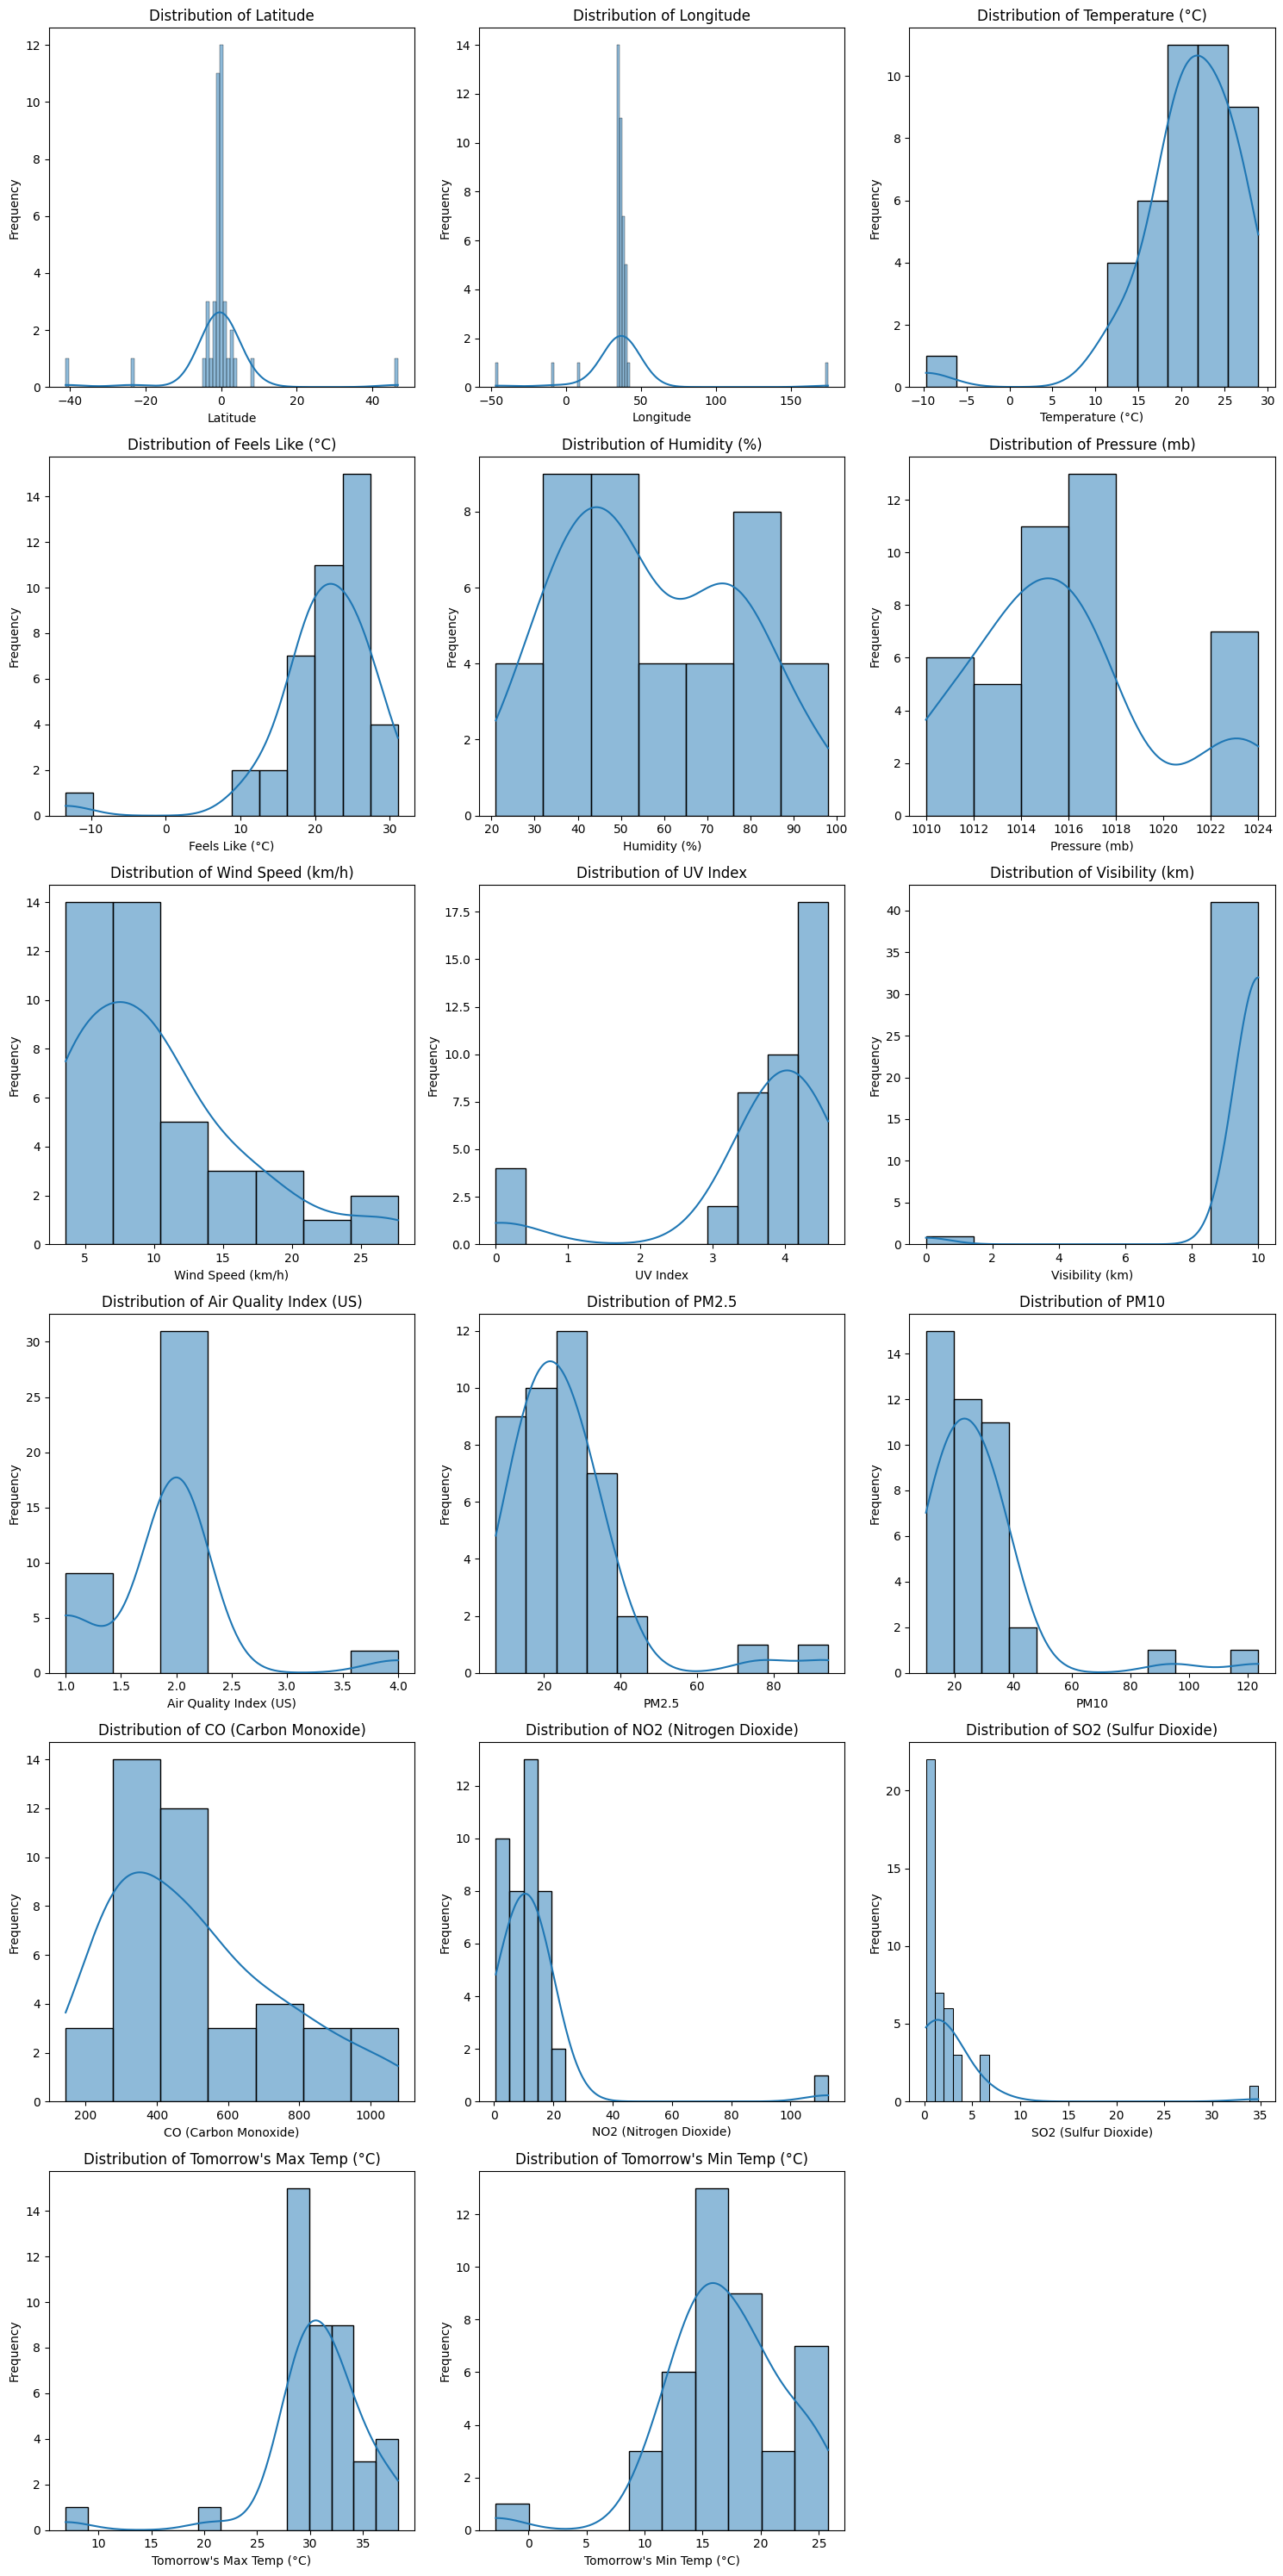

In [11]:
# Number of numerical features
num_features = len(df.select_dtypes(include=['float64', 'int64']).columns)

# Determine the number of rows and columns for the subplots
num_cols = 3
num_rows = math.ceil(num_features / num_cols)

# Plotting the distribution of numerical features
plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()


<ipython-input-12-98f79b260d75>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Tomorrow's Condition"], order=df["Tomorrow's Condition"].value_counts().index, palette="coolwarm")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


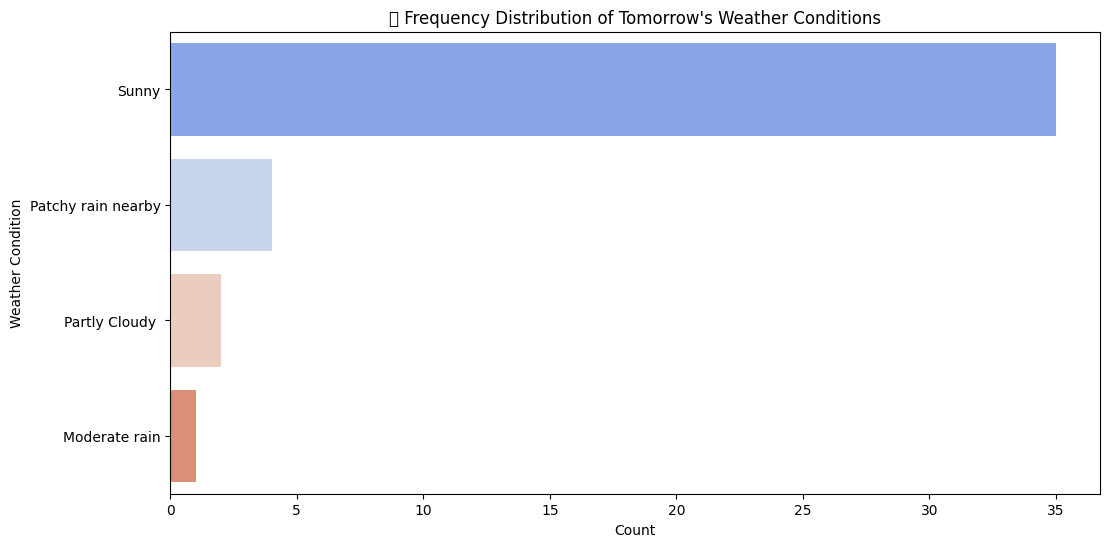

In [12]:
# 🔹 Plot Bar Chart for Tomorrow's Weather Condition
plt.figure(figsize=(12, 6))
sns.countplot(y=df["Tomorrow's Condition"], order=df["Tomorrow's Condition"].value_counts().index, palette="coolwarm")
plt.xlabel("Count")
plt.ylabel("Weather Condition")
plt.title("📌 Frequency Distribution of Tomorrow's Weather Conditions")
plt.show()

In [13]:
# Select only numeric columns (int64 and float64)
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation with 'UV Index'
uv_corr = numeric_df.corr()['UV Index']

# Display correlations
print(uv_corr)


Latitude                    0.017346
Longitude                   0.103003
Temperature (°C)            0.392035
Feels Like (°C)             0.392936
Humidity (%)               -0.341086
Pressure (mb)              -0.035778
Wind Speed (km/h)           0.007717
UV Index                    1.000000
Visibility (km)             0.469818
Air Quality Index (US)     -0.310495
PM2.5                      -0.457238
PM10                       -0.509516
CO (Carbon Monoxide)        0.021001
NO2 (Nitrogen Dioxide)     -0.419434
SO2 (Sulfur Dioxide)       -0.404899
Tomorrow's Max Temp (°C)    0.514225
Tomorrow's Min Temp (°C)    0.338359
Name: UV Index, dtype: float64


In [14]:
df['Weather Condition'].value_counts()

,count
Weather Condition,
Sunny,35
Partly cloudy,4
Partly Cloudy,1
Fog,1
Clear,1


# **Visualizations**

In [15]:
import folium
from folium.plugins import HeatMap
import pandas as pd

# Create a map centered around Kenya
m = folium.Map(location=[0.0236, 37.9062], zoom_start=6)

# Prepare data for the heat map
heat_data = [[row['Latitude'], row['Longitude'], row['Temperature (°C)']] for index, row in df.iterrows()]

# Add the heat map
HeatMap(heat_data).add_to(m)

# Add markers to the map
for index, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Temperature: {row['Temperature (°C)']}°C",
        icon=folium.Icon(color='blue')
    ).add_to(m)

# Save to an HTML file
m.save('kenya_temperature_heatmap.html')

# Display the map
m


In [16]:
# 🔹 Geospatial Map of Cities
fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", color="Temperature (°C)", size="Wind Speed (km/h)", mapbox_style="open-street-map", title="🌎 Temperature Across Kenya")
fig.show()

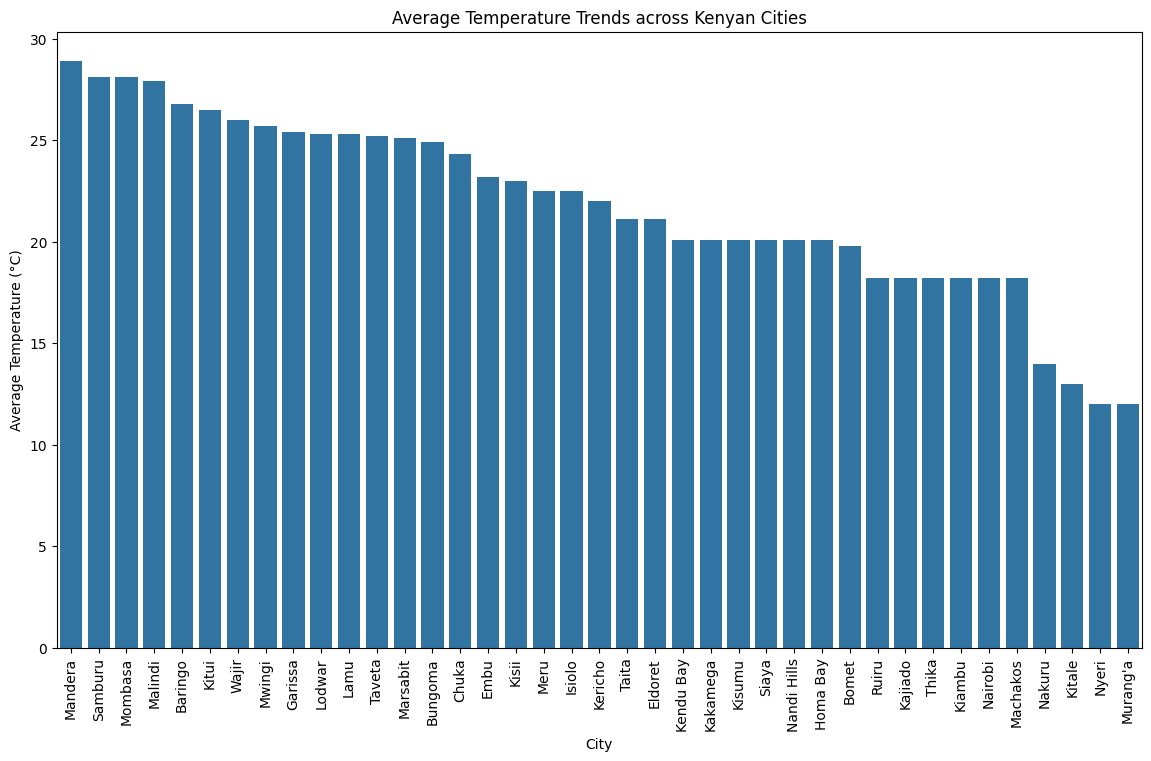

In [17]:
# Filter the DataFrame to include only the specified cities
df_filtered = df[df['City'].isin(kenyan_cities)]

# Calculate the average temperature for each city
avg_temp_by_city = df_filtered.groupby('City')['Temperature (°C)'].mean().reset_index()

# Sort the DataFrame by temperature in descending order
avg_temp_by_city = avg_temp_by_city.sort_values(by='Temperature (°C)', ascending=False)

# Vertical Bar Graph for Temperature Trends across Kenyan Cities
plt.figure(figsize=(14, 8))
sns.barplot(x='City', y='Temperature (°C)', data=avg_temp_by_city)
plt.title('Average Temperature Trends across Kenyan Cities')
plt.xlabel('City')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=90)
plt.show()

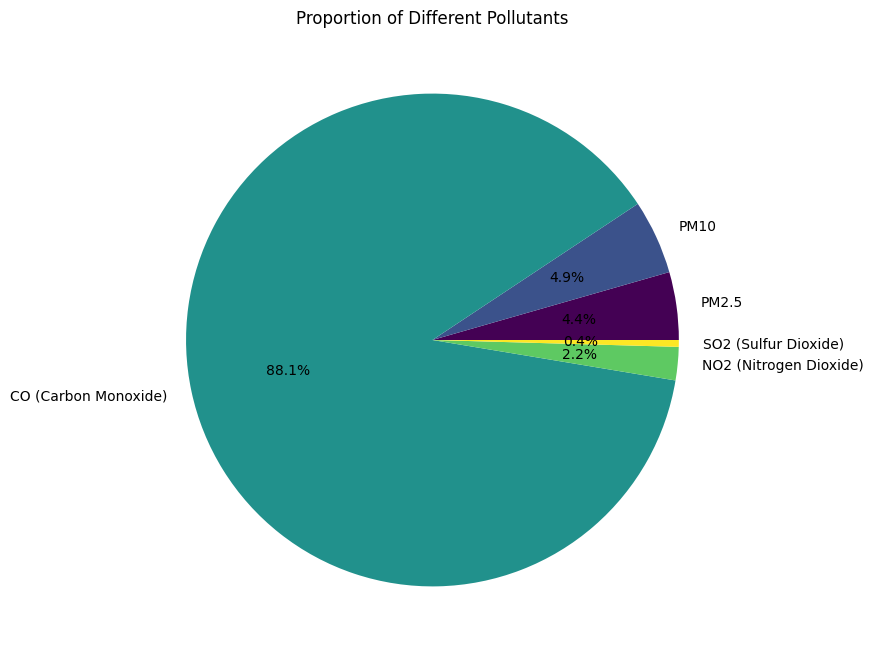

In [18]:
# Pie Chart for Pollutants
pollutants = ['PM2.5', 'PM10', 'CO (Carbon Monoxide)', 'NO2 (Nitrogen Dioxide)', 'SO2 (Sulfur Dioxide)']
pollutant_totals = df[pollutants].mean()

plt.figure(figsize=(8, 8))
plt.pie(pollutant_totals, labels=pollutants, autopct='%1.1f%%', colors=cm.viridis(np.linspace(0, 1, len(pollutants))))
plt.title('Proportion of Different Pollutants')
plt.show()

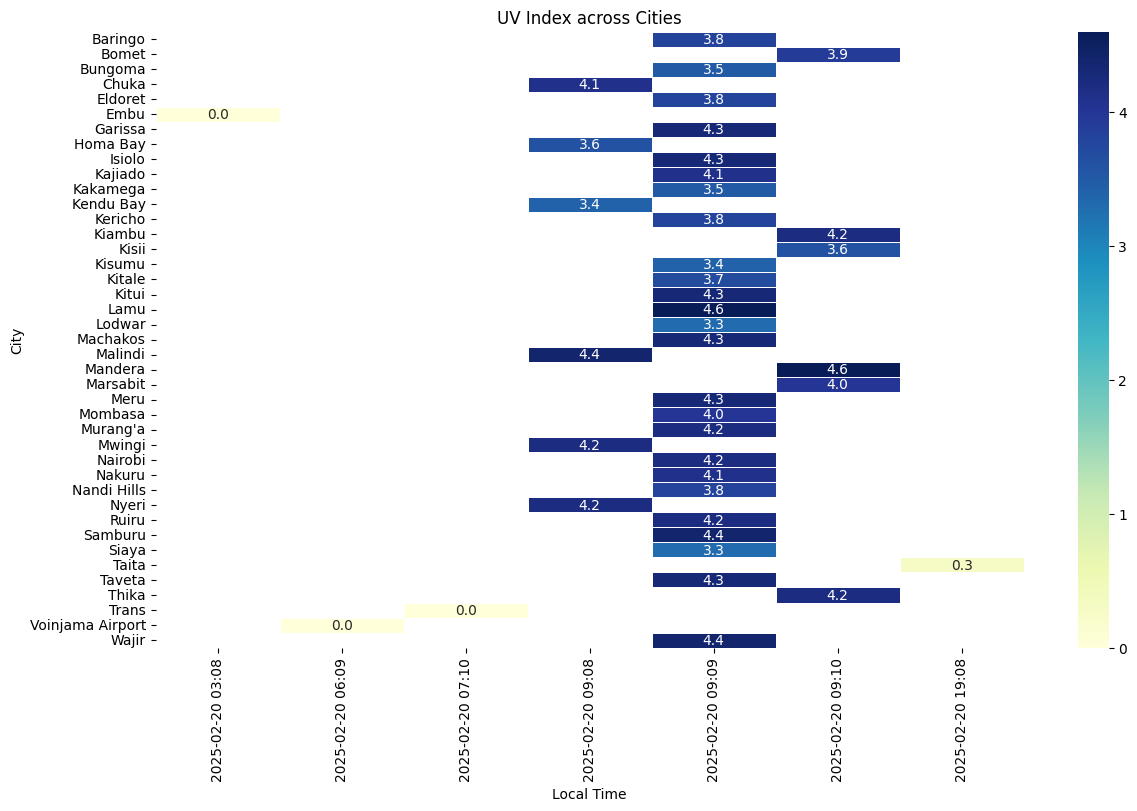

In [19]:

# Create a pivot table for the heatmap
pivot_table = df.pivot_table(values='UV Index', index='City', columns='Local Time', aggfunc='mean')

# Heatmap for UV Index across Cities
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)
plt.title('UV Index across Cities')
plt.xlabel('Local Time')
plt.ylabel('City')
plt.xticks(rotation=90)
plt.show()


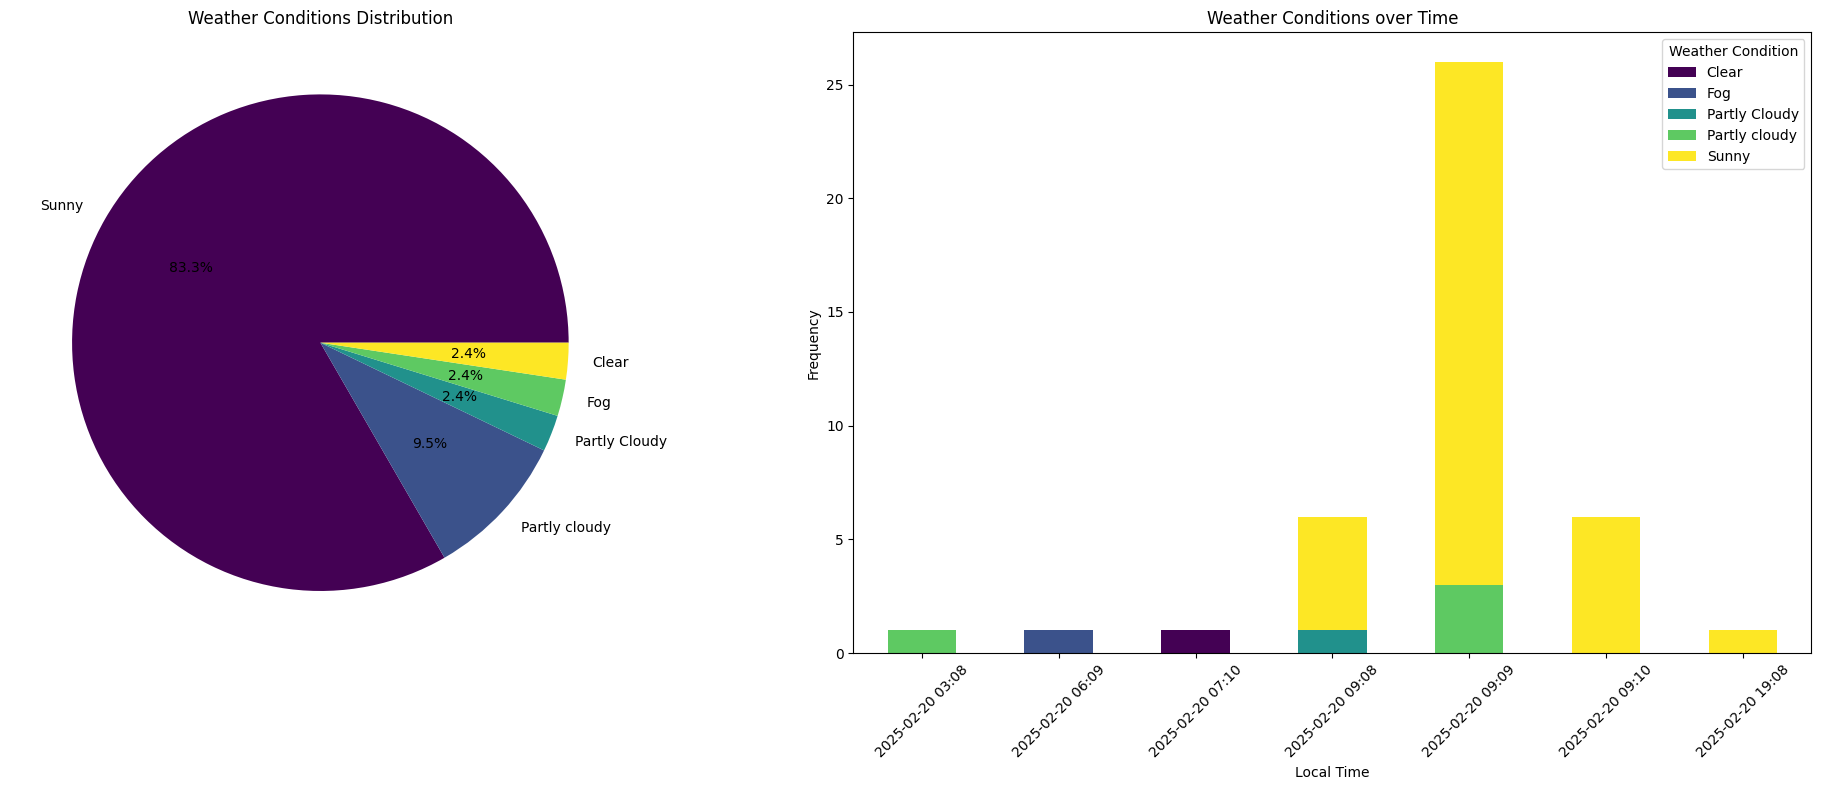

In [20]:
# Pie Chart for Weather Conditions
weather_conditions = df['Weather Condition'].value_counts()

# Stacked Bar Chart for Weather Conditions over Time
weather_time = pd.crosstab(df['Local Time'], df['Weather Condition'])

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Pie Chart
axes[0].pie(weather_conditions, labels=weather_conditions.index, autopct='%1.1f%%',
            colors=plt.cm.viridis(np.linspace(0, 1, len(weather_conditions))))
axes[0].set_title('Weather Conditions Distribution')

# Stacked Bar Chart for Weather Conditions over Time
weather_time.plot(kind='bar', stacked=True, ax=axes[1], colormap='viridis')
axes[1].set_title('Weather Conditions over Time')
axes[1].set_xlabel('Local Time')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Weather Condition')

plt.tight_layout()
plt.show()


**correlation Heatmap**

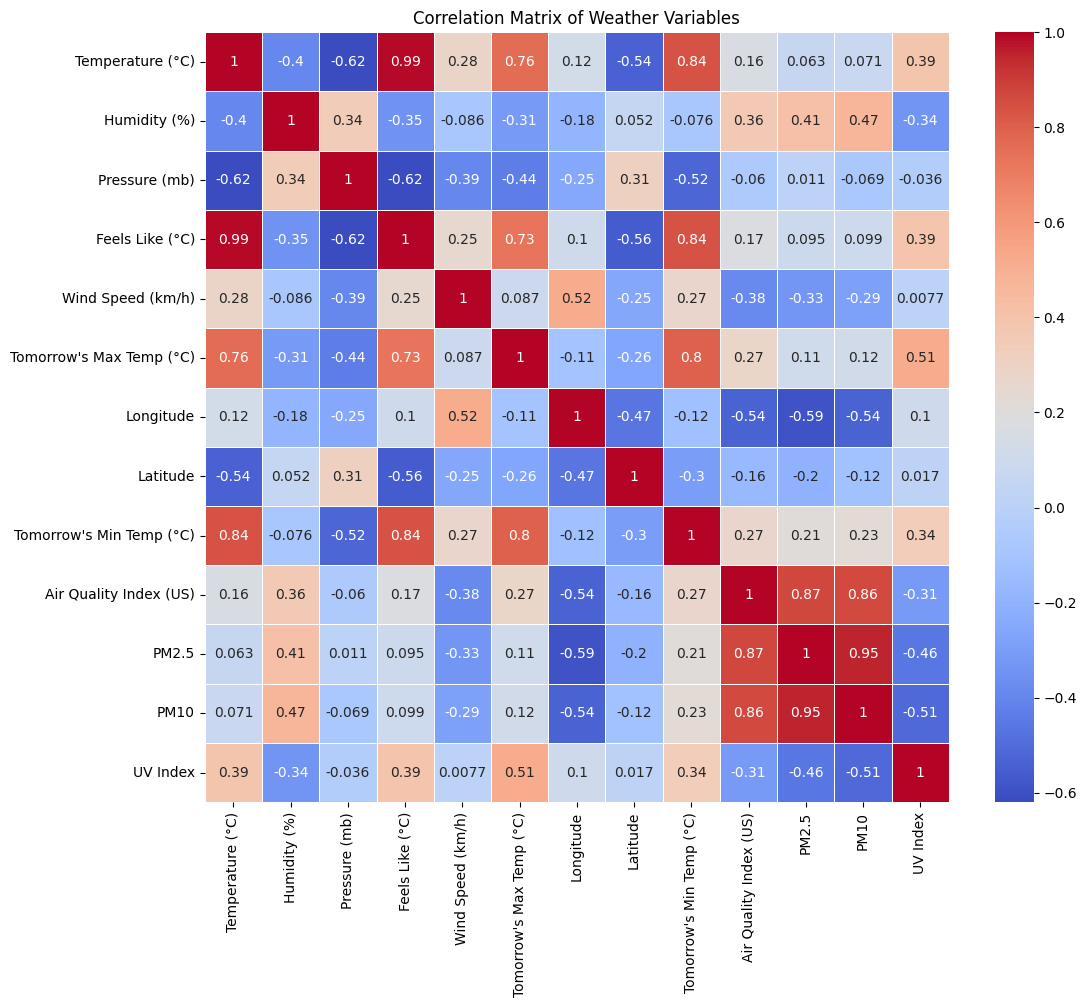

In [21]:

# Define relevant columns
col = [
    'Temperature (°C)', 'Humidity (%)', 'Pressure (mb)', 'Feels Like (°C)',
    'Wind Speed (km/h)', "Tomorrow's Max Temp (°C)","Longitude","Latitude",
    "Tomorrow's Min Temp (°C)","Air Quality Index (US)","PM2.5","PM10", "UV Index"
]

# Apply preprocessing to numerical columns for correlation analysis
numerical_data = df[col]  # Select numerical data

numerical_transformer = StandardScaler()  # Initialize scaler
numerical_data_scaled = numerical_transformer.fit_transform(numerical_data)  # Scale data

# Convert scaled data back into a DataFrame
numerical_data_scaled_df = pd.DataFrame(numerical_data_scaled, columns=col)

# Calculate the correlation matrix
correlation_matrix = numerical_data_scaled_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Weather Variables')
plt.show()


# **Data Pre-processing**

In [22]:
# make a copy of the df
df_copy = df.copy()
df_copy1=df_copy.copy()

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# List of columns to drop (including "Weather Condition")
columns_to_drop = [
    "Country", "Local Time", "Visibility (km)", "Weather Condition", "Tomorrow's Condition", "Wind Direction", "Longitude", "Latitude"
]

# Drop unnecessary columns
df_copy.drop(columns=columns_to_drop, inplace=True)

# Convert 'Sunrise' and 'Sunset' to numerical features (minutes since midnight)
df_copy['Sunrise'] = pd.to_datetime(df_copy['Sunrise'], format='%I:%M %p').dt.hour * 60 + pd.to_datetime(df_copy['Sunrise'], format='%I:%M %p').dt.minute
df_copy['Sunset'] = pd.to_datetime(df_copy['Sunset'], format='%I:%M %p').dt.hour * 60 + pd.to_datetime(df_copy['Sunset'], format='%I:%M %p').dt.minute

# One-hot encode the 'City' column and drop the first column to avoid multicollinearity
df_copy = pd.get_dummies(df_copy, columns=['City'], drop_first=True)

# Rename encoded column names to contain only the city name and convert their dtype to float64
encoded_columns = [col for col in df_copy.columns if col.startswith('City_')]
new_column_names = {col: col.split('_')[1] for col in encoded_columns}
df_copy.rename(columns=new_column_names, inplace=True)

# Convert the dtype of city columns to float64
city_columns = list(new_column_names.values())
df_copy[city_columns] = df_copy[city_columns].astype('int64')

# Reset index
df_copy.reset_index(drop=True, inplace=True)

# Separate target variable
uv_index = df_copy[['UV Index']]

# Standardize the features (excluding 'UV Index')
feature_scaler = StandardScaler()
scaled_features = feature_scaler.fit_transform(df_copy.drop(columns=['UV Index']))

# Standardize the target variable
target_scaler = StandardScaler()
scaled_target = target_scaler.fit_transform(uv_index)

# Convert scaled features back to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=df_copy.columns[df_copy.columns != 'UV Index'])

# Add scaled 'UV Index' back
scaled_df['UV Index'] = scaled_target

# Display the first few rows of the scaled DataFrame
print(scaled_df.head())

# Print the names of the created columns after encoding
print("One-hot encoded city columns:", city_columns)


   Temperature (°C)  Feels Like (°C)  Humidity (%)  Pressure (mb)  \
0         -0.431356        -0.426982      1.028767       1.840431   
1          1.113501         1.367733      0.677072      -1.210810   
2         -0.134869        -0.162644     -0.378012       0.314811   
3         -1.086750        -0.913920     -0.076559       0.314811   
4          0.021178        -0.023519     -1.433096      -0.193730   

   Wind Speed (km/h)  Air Quality Index (US)     PM2.5      PM10  \
0          -0.123882                0.190485 -0.073340 -0.151427   
1           0.584127                0.190485  0.091885  0.325111   
2           0.040771                0.190485  0.363326  0.187648   
3          -1.078871                0.190485 -0.450996 -0.444682   
4           1.292136               -1.409588 -0.757842 -0.701279   

   CO (Carbon Monoxide)  NO2 (Nitrogen Dioxide)  ...     Ruiru   Samburu  \
0              0.088315                0.136696  ... -0.156174 -0.156174   
1             -0.819261 

**Train-Test split**

In [24]:
# save the data in df_copy into a csv file and named it scaled weather data
df_copy.to_csv("scaled_weather_data.csv", index=False)

scaled_data=pd.read_csv("scaled_weather_data.csv")
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature (°C)          42 non-null     float64
 1   Feels Like (°C)           42 non-null     float64
 2   Humidity (%)              42 non-null     int64  
 3   Pressure (mb)             42 non-null     float64
 4   Wind Speed (km/h)         42 non-null     float64
 5   UV Index                  42 non-null     float64
 6   Air Quality Index (US)    42 non-null     int64  
 7   PM2.5                     42 non-null     float64
 8   PM10                      42 non-null     float64
 9   CO (Carbon Monoxide)      42 non-null     float64
 10  NO2 (Nitrogen Dioxide)    42 non-null     float64
 11  SO2 (Sulfur Dioxide)      42 non-null     float64
 12  Tomorrow's Max Temp (°C)  42 non-null     float64
 13  Tomorrow's Min Temp (°C)  42 non-null     float64
 14  Sunrise     

In [25]:
# Define features (X) and target variable (y)
X = scaled_data.drop(columns=['UV Index'])
y = scaled_data['UV Index']
# Split data into training (70%), validation (15%), and testing (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# **Modelling**

**LSTM**

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 30.5182 - val_loss: 29.3580 - learning_rate: 0.0010
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step - loss: 29.2402 - val_loss: 28.6082 - learning_rate: 0.0010
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 28.4875 - val_loss: 27.9939 - learning_rate: 0.0010
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 28.1906 - val_loss: 27.4078 - learning_rate: 0.0010
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 26.8041 - val_loss: 26.7753 - learning_rate: 0.0010
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - loss: 26.2994 - val_loss: 26.1002 - learning_rate: 0.0010
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - loss: 26.4201 - val_loss: 25.4126 - learning_rate: 0.0010
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - loss: 24.6864 - val_loss: 24.7733 - learning_rate: 0.0010
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - loss: 24.1650 - val_loss: 24.1752 - learning_rate: 0.0010
Epoch 10/100
1/1 

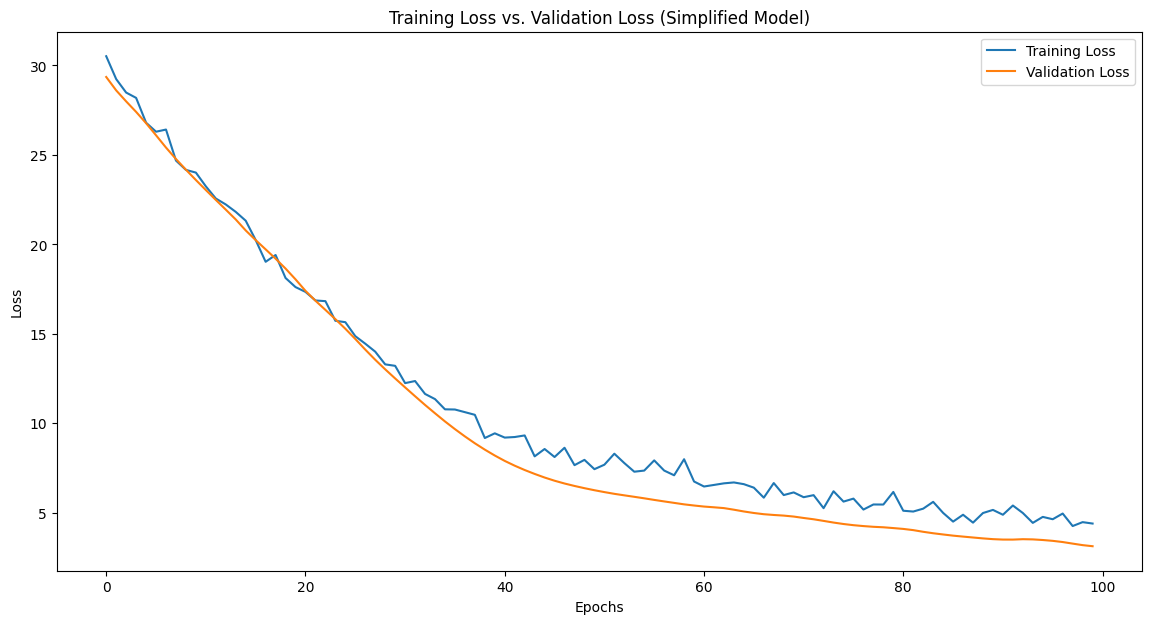

In [26]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Define seq_length and target_scaler here
seq_length = 5  # Reduced sequence length to fit your validation and test sets
target_scaler = StandardScaler()  # Separate scaler for the target variable

# Define a function to create sequences
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length + 1):
        sequences.append(data[i:i + seq_length])
    return np.array(sequences)

# Ensure input data is float
X_train = X_train.astype(np.float32)
X_val = X_val.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_val = y_val.astype(np.float32)
y_test = y_test.astype(np.float32)

# Create sequences for X data
X_train_seq = create_sequences(X_train, seq_length)
X_val_seq = create_sequences(X_val, seq_length)
X_test_seq = create_sequences(X_test, seq_length)

# Adjust y data to match the sequences
y_train_seq = y_train[seq_length - 1:].values
y_val_seq = y_val[seq_length - 1:].values
y_test_seq = y_test[seq_length - 1:].values

# Reshape y data to 2D array for scaler
y_train_seq = y_train_seq.reshape(-1, 1)
y_val_seq = y_val_seq.reshape(-1, 1)
y_test_seq = y_test_seq.reshape(-1, 1)

# Fit the target_scaler with the concatenated target data, reshaped to 2D array
target_scaler.fit(np.concatenate([y_train_seq, y_val_seq, y_test_seq], axis=0))

# Reshape input sequences to 3D array (samples, seq_length, features)
X_train_seq = X_train_seq.reshape((X_train_seq.shape[0], seq_length, -1))
X_val_seq = X_val_seq.reshape((X_val_seq.shape[0], seq_length, -1))
X_test_seq = X_test_seq.reshape((X_test_seq.shape[0], seq_length, -1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(32, activation='tanh', input_shape=(seq_length, X_train_seq.shape[2]), return_sequences=True, kernel_regularizer=l2(0.1)))
model.add(Dropout(0.3))  # Increased dropout
model.add(LSTM(32, activation='tanh', kernel_regularizer=l2(0.1)))
model.add(Dropout(0.3))  # Increased dropout
model.add(Dense(1, activation='linear'))

# Set learning rate inside optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

# Train with early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)

history = model.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_data=(X_val_seq, y_val_seq), callbacks=[early_stopping, reduce_lr])

# Evaluate the model
mse = model.evaluate(X_test_seq, y_test_seq)
print(f'Test Mean Squared Error: {mse}')

# Make predictions
y_pred = model.predict(X_test_seq)

# Calculate R-squared
r2 = r2_score(y_test_seq, y_pred)
print(f"R-squared (R²): {r2}")

# Unscale the predictions using the target scaler
y_pred_unscaled = target_scaler.inverse_transform(y_pred).flatten()

# Print unscaled predictions
print(f"Unscaled Predictions: {y_pred_unscaled}")

# Plot training loss vs. validation loss
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training Loss vs. Validation Loss (Simplified Model)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [27]:
print(model.summary())


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 5, 32)               │          11,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,853 (229.90 KB)

 Trainable params: 19,617 (76.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 39,236 (153.27 KB)

None


In [28]:
# save my model above so i can use it on streamlit
model.save("model_LSTM.keras")


In [29]:
# list of the predicted values
print(y_pred_unscaled)

[8.064548 8.050103 8.081725]


**Hyperparameter Tuning using Randomized Search**

In [31]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 7.8 MB/s eta 0:00:00


Trial 10 Complete [00h 00m 13s]
val_loss: 0.26323580741882324

Best val_loss So Far: 0.10816037654876709
Total elapsed time: 00h 02m 20s


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning:

Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 5, 96)               │          58,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 96)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 96)                  │          74,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              97 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 132,577 (517.88 KB)

 Trainable params: 132,577 (517.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 1.4536 - val_loss: 0.1586
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - loss: 1.7308 - val_loss: 0.2082
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - loss: 1.4808 - val_loss: 0.1578
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - loss: 0.9853 - val_loss: 0.0971
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - loss: 1.3877 - val_loss: 0.0734
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - loss: 1.2561 - val_loss: 0.0617
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - loss: 1.5072 - val_loss: 0.0549
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - loss: 1.1351 - val_loss: 0.0762
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 1.4768 - val_loss: 0.1120
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - loss: 1.8741 - val_loss: 0.1677
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 1.5875 - val_loss: 0.2275
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 1.5550 - val_loss: 

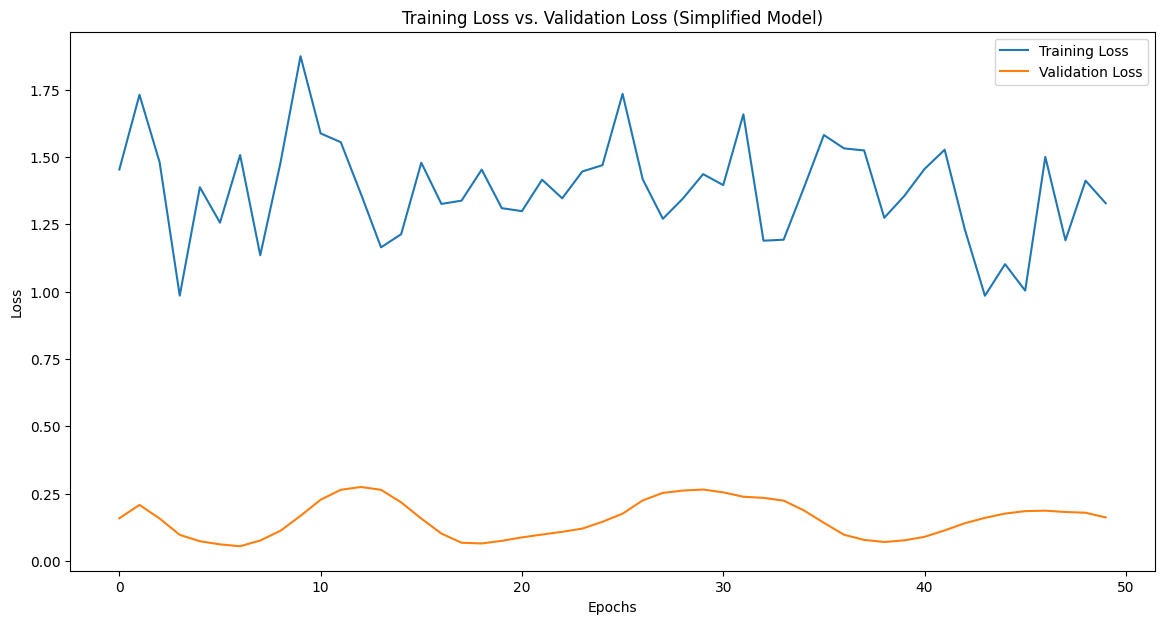

In [32]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define a function to create the model
def build_model(hp):
    model = Sequential()
    units = hp.Int('units', min_value=32, max_value=128, step=32)
    dropout_rate = hp.Choice('dropout_rate', values=[0.2, 0.3, 0.4])
    l2_reg = hp.Choice('l2_reg', values=[0.01, 0.001, 0.0001])
    learning_rate = hp.Choice('learning_rate', values=[0.001, 0.01, 0.1])

    model.add(LSTM(units, activation='tanh', input_shape=(seq_length, X_train_seq.shape[2]), return_sequences=True, kernel_regularizer=l2(l2_reg)))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units, activation='tanh', kernel_regularizer=l2(l2_reg)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')
    return model

# Initialize Keras Tuner with RandomSearch
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='lstm_hyperparameter_tuning'
)

# Ensure input data is float
X_train = X_train.astype(np.float32)
X_val = X_val.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_val = y_val.astype(np.float32)
y_test = y_test.astype(np.float32)

# Create sequences for X data
X_train_seq = create_sequences(X_train.values, seq_length)
X_val_seq = create_sequences(X_val.values, seq_length)
X_test_seq = create_sequences(X_test.values, seq_length)

# Adjust y data to match the sequences
y_train_seq = y_train.values[seq_length - 1:]
y_val_seq = y_val.values[seq_length - 1:]
y_test_seq = y_test.values[seq_length - 1:]

# Reshape y data to 2D array for scaler
y_train_seq = y_train_seq.reshape(-1, 1)
y_val_seq = y_val_seq.reshape(-1, 1)
y_test_seq = y_test_seq.reshape(-1, 1)

# Fit the target_scaler with the concatenated target data, reshaped to 2D array
target_scaler.fit(np.concatenate([y_train_seq, y_val_seq, y_test_seq], axis=0))

# Reshape input sequences to 3D array (samples, seq_length, features)
X_train_seq = X_train_seq.reshape((X_train_seq.shape[0], seq_length, -1))
X_val_seq = X_val_seq.reshape((X_val_seq.shape[0], seq_length, -1))
X_test_seq = X_test_seq.reshape((X_test_seq.shape[0], seq_length, -1))

# Search for the best hyperparameters
tuner.search(X_train_seq, y_train_seq, epochs=50, validation_data=(X_val_seq, y_val_seq))

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Summary of the best model
best_model.summary()

# Get the best hyperparameters
best_hp = tuner.get_best_hyperparameters()[0]

# Define default values for epochs and batch size if not found in hyperparameters
best_epochs = best_hp.values.get('epochs', 50)
best_batch_size = best_hp.values.get('batch_size', 32)

# Train the final model with the best hyperparameters
history = best_model.fit(X_train_seq, y_train_seq, validation_data=(X_val_seq, y_val_seq), epochs=best_epochs, batch_size=best_batch_size)

# Evaluate the model
mse = best_model.evaluate(X_test_seq, y_test_seq)
print(f'Test Mean Squared Error: {mse}')

# Make predictions
y_pred = best_model.predict(X_test_seq)

# Calculate R-squared
r2 = r2_score(y_test_seq, y_pred)
print(f"R-squared (R²): {r2}")

# Unscale the predictions using the target scaler
y_pred_unscaled = target_scaler.inverse_transform(y_pred).flatten()

# Print unscaled predictions
print(f"Unscaled Predictions: {y_pred_unscaled}")

# Plot training loss vs. validation loss
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training Loss vs. Validation Loss (Simplified Model)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
